# Census Income Project


Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight):
- The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

- Age: Describes the age of individuals. Continuous.
- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Number of years spent in education. Continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Continuous.
- capital-loss: Continuous.
- hours-per-week: Continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [85]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import GridSearchCV

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")
import pickle


In [3]:
df=pd.read_csv('census_income.csv')

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have only 6 features which are numerical and the remaining 9 features are categorical.

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values are present , hence no imputation is needed for numerical columns. But sometimes, null values in categorical features need not be labeled as np.Nan, they can be in any string form. So lets check the unique values of all the categorical columns.

In [8]:
# Identify Numeric features
num_features = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week','Income']

# Identify Categorical features
cat_features = ['Workclass','Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']

In [9]:
for i in cat_features:
    print(df[i].value_counts())
    print("\n")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


 Prof-specialty       4140
 Craft-repair         4099
 Exec-mana

As we can see we have a strong amount of "?" present in "Workclass", "Native_country" and "Occupation". Let's first fill them with np.Nan and impute them with mode afterwards.

In [10]:
for i in ["Workclass", "Native_country", "Occupation"]:
    df[i].replace(' ?', np.NaN,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
for col in ['Workclass', 'Occupation', 'Native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


__All categorical null values have been successfully imputed now__

In [14]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations:
- We can see that "capital gain" and "capital loss" have extreme outliers and 75% of the data in both features comprises of a single value,"0"
- The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
- The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years..
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [15]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(32536, 15)

# EDA:

labels count:   <=50K    24697
 >50K      7839
Name: Income, dtype: int64


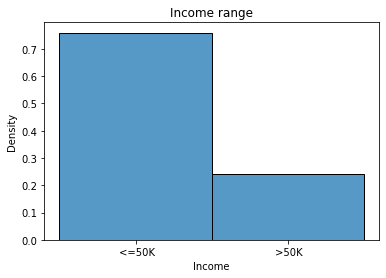

In [17]:
# class imbalance
print("labels count: ",df["Income"].value_counts())
sns.histplot(data=df,x="Income",stat="density",palette="Icefire",)
plt.title("Income range")
plt.show()

Observations:
- The number of people earning more than 50K dollars an year is one third of the people earning less than it.
- This data was collected in 1996, so 50K dollars of that time are definitely worth more than 50k dollars today.

In [18]:
cat_df=df.select_dtypes(include="object")

In [19]:
num_df= df.select_dtypes(exclude="object")

In [20]:
num_df.shape, cat_df.shape

((32536, 6), (32536, 9))

In [21]:
num_df.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [22]:
cat_df.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

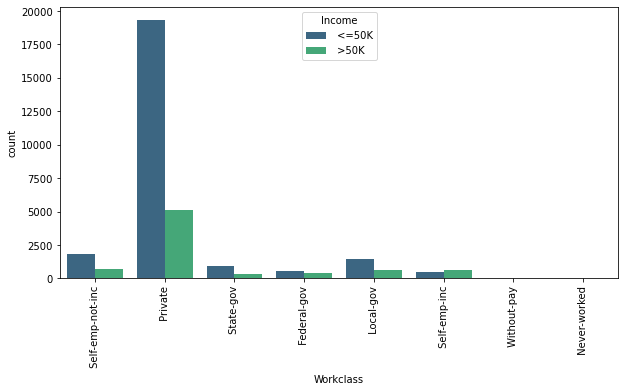

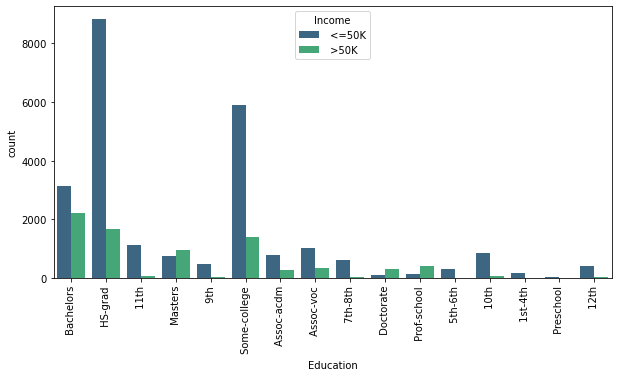

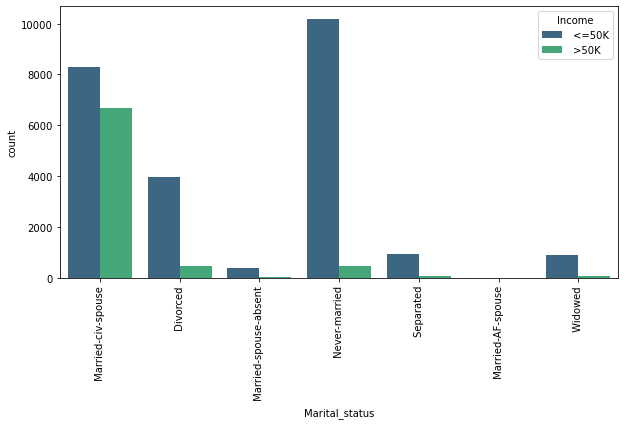

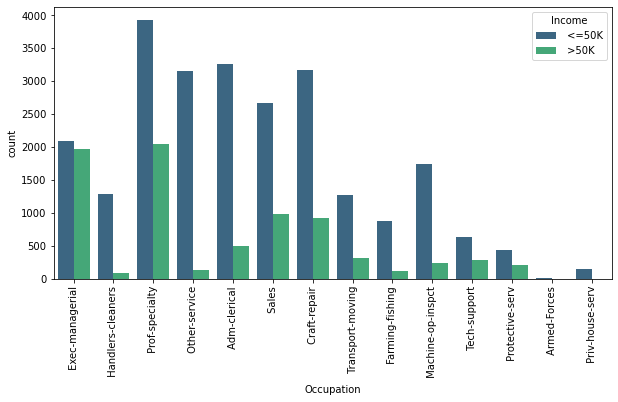

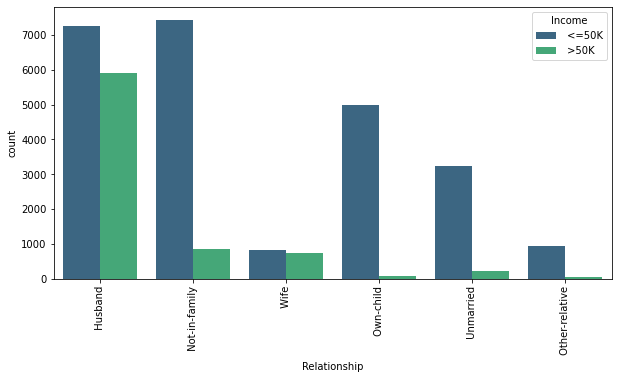

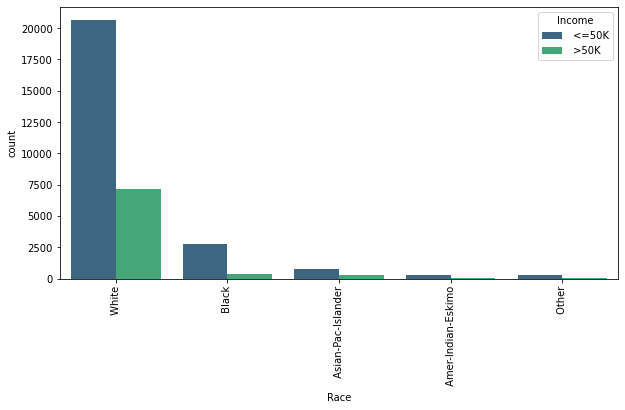

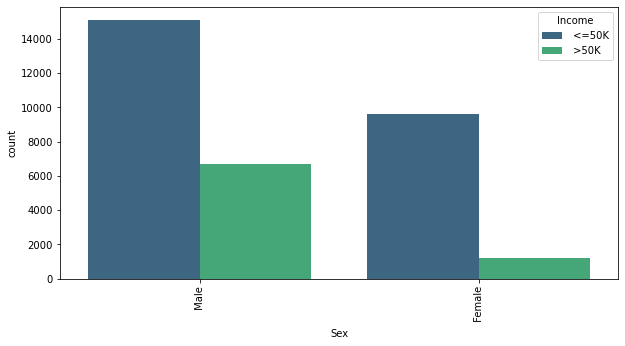

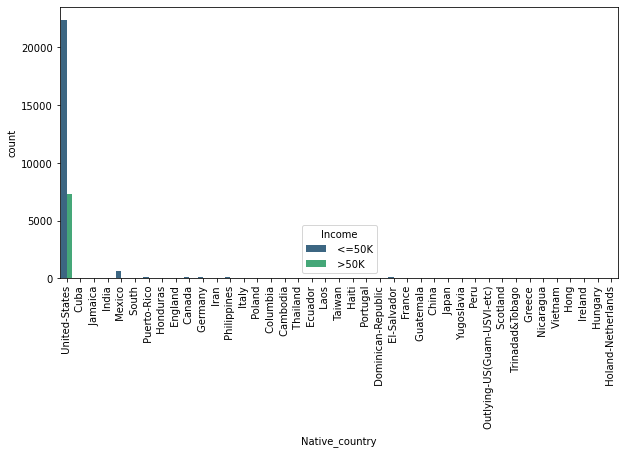

In [23]:
for col in cat_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col,hue="Income",palette="viridis")
    plt.xticks(rotation=90)

Observations:
- Privately employed citizens are more likely to earn most than 50k dollars than any other workclass. Also self emploed Inc is the only category where people earning >50k dollars exceeds people earning <50k dollars explaining the trend of successful startups.
- People who have completed a Bachelor's degree are most likely to earn more than 50k dollars than any other Education qualification. High School grads are marginally lower but come in at the second spot after Bachelor's qualification. Also, only a tiny amount of people earned >50k dollars until the 12th standard.Anything above Bachelor's level of education, people start t earning >50k dollars exceeds people earning <50k dollars.  
- People with marital status as "marital-civ-spouse" are most likely to earn more than 50k dollars.
- Peole having the occupation as "Exec-Managerial" have a 50-50 chance they'll earn >50k dollars/year."Prof-speacialty" is  where you can exceed 50k dollar limit compared to other occupations.
- small share of unmarried people earning >50k per year. Husbands have a higher probability of earning >50k than wives, even though wives are more likely to have a 50% chance at earning >50k compared to husbands who have lower than that.
- Whites earn typically more than any other race, but we can also see that the dataset is predominantly made on whitepeople with other races having negligible data.So, making a generalizrion maybe wrong. Also, Blacks have almost negligible chance to earn >50k.
- Males have a higher chance at earning >50k/year than females.
- Most of the data belongs to employees from United States.Negligible data is present for other countries like, Mexico and El Salvador, still has some datapoints but most of the people belongs to these countries earn <50k dollars/year.

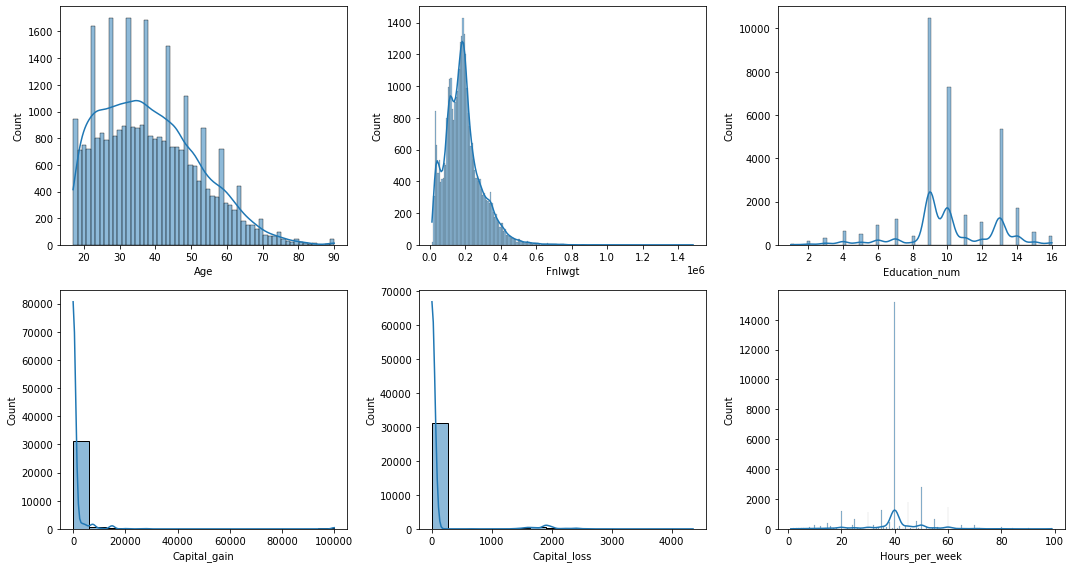

In [24]:
plt.figure(figsize=(15,8))
x=1
for i in num_features:
    if x<=6:
        plt.subplot(2,3,x)
        sns.histplot(df[i],kde=True)
        x+=1
plt.tight_layout()
plt.show()

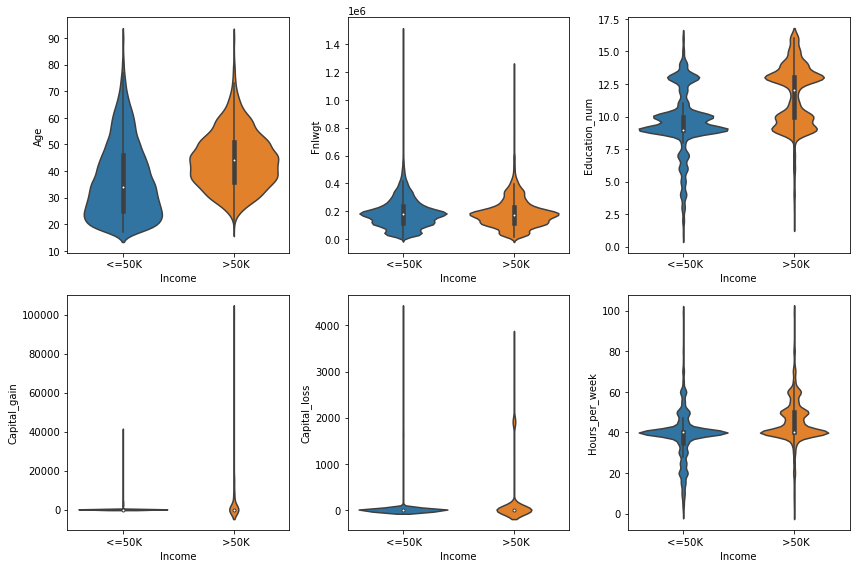

In [25]:
plt.figure(figsize=(12,8))
x=1
for i in num_features:
    if x<=6:
        plt.subplot(2,3,x)
        sns.violinplot(data = df, x="Income",y=i)
        x+=1
plt.tight_layout()
plt.show()

Observations:
- Numericals columns are somewhat skewed.
- Most people belong to the age group of 20-40 years.
- Most of the people are working a 40 hour work week.
- Majority of people have atleast 8 years of education , local peaks at 10 and 13 yeas of education as well.

## Encoding:

In [26]:
cat_df.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [27]:
le = LabelEncoder()
for col in cat_df.columns:
    le.fit(df[col])
    df[col] = le.transform(df[col])

- 0: <=50k dollars
- 1: >50k Dollars

In [28]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


<AxesSubplot:>

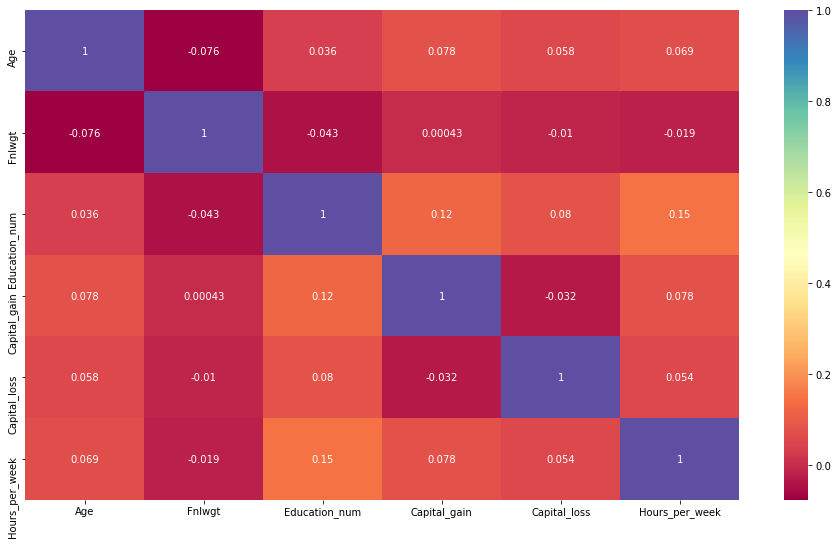

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(num_df.corr(),annot=True,cmap="Spectral")

No Multicollinearity can be seen in the dataset.

In [30]:
data_corr=df.corr()
data_corr["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335299
Age               0.234039
Hours_per_week    0.229659
Capital_gain      0.223340
Sex               0.215984
Capital_loss      0.150498
Education         0.079361
Race              0.071855
Occupation        0.034490
Native_country    0.022858
Workclass         0.002747
Fnlwgt           -0.009521
Marital_status   -0.199187
Relationship     -0.250955
Name: Income, dtype: float64

## Checking Outliers:

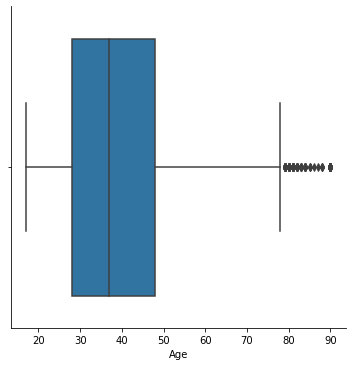

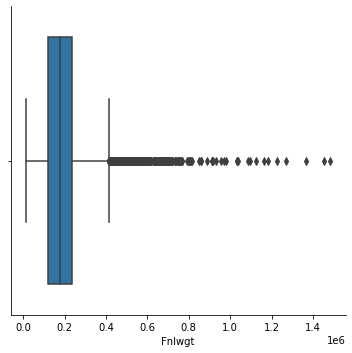

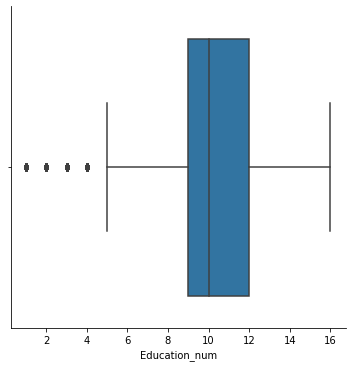

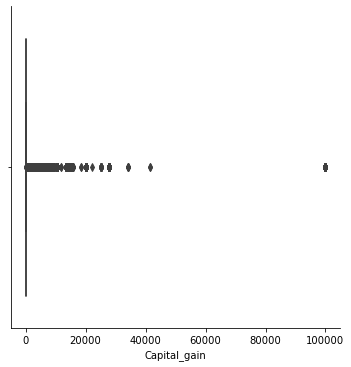

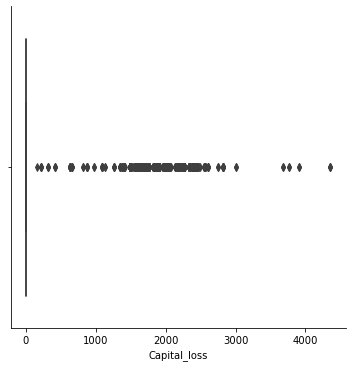

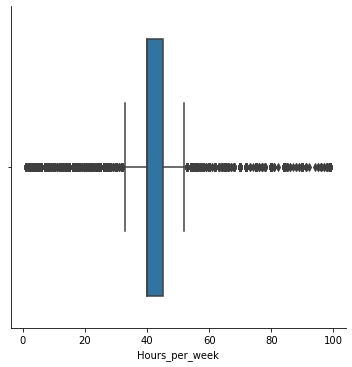

In [31]:
for col in num_df.columns:
    sns.catplot(kind="box",x=col,data=df)

__As we can see there are outliers resent in every numerical column of the dataset. Here, we will update the dataframe using the value of zscore we will find by using numerical columns and keep only those numerical datapoints whose zscore is less than 3. We will basically reduce the size of the whole dataframe by removing datapoints whose zscore>3, to create an efficient model later__ 

In [32]:
z = np.abs(zscore(num_df))
z.shape

(32536, 6)

In [33]:
threshold = 3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64), array([5, 4, 5, ..., 0, 5, 5], dtype=int64))


In [34]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
print(df.shape)

(29808, 15)
(32536, 15)


In [35]:
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


### Checking Skewness:

In [36]:
df_new.skew()[num_features]

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
Income             1.329852
dtype: float64

Columns to be transformed: ["Fnlwgt",Capital_gain,Capital_loss]. 
Other numerical columns are within the standard(or acceptable) range of +/-0.5

In [37]:
transf=df_new[{'Capital_gain', 'Capital_loss'}]

for col in transf:
    df_new[col]=np.log1p(df_new[col])

In [38]:
df_new.skew()[num_features]

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       3.115925
Capital_loss      25.102455
Hours_per_week    -0.353124
Income             1.329852
dtype: float64

After trying different transformations, log1p Yielded the best results. Also, in each transformation,"Fnlwgt" feature after transformation increased in each skewness. So, I left it out from transformation above. Even after transformation, skewness was barely reduced.

## Data Preprocessing:

In [39]:
x=df_new.drop(columns=["Income"])
y=df_new['Income']

In [44]:
for i in range(1,300):
    # setting up testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr = LogisticRegression().fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State = ",i)
        print("Training r2 score: ",(accuracy_score(y_train,pred_train)*100))
        print("Testing r2 score: ",(accuracy_score(y_test,pred_test)*100))

At Random State =  6
Training r2 score:  79.24494542852031
Testing r2 score:  79.24047235641439
At Random State =  8
Training r2 score:  76.2390409733405
Testing r2 score:  76.20772946859904
At Random State =  14
Training r2 score:  79.16443013061371
Testing r2 score:  79.17337627482554
At Random State =  17
Training r2 score:  76.10484881016282
Testing r2 score:  76.1406333870102
At Random State =  28
Training r2 score:  76.07353730542137
Testing r2 score:  76.1406333870102
At Random State =  31
Training r2 score:  77.69278940776525
Testing r2 score:  77.65700483091787
At Random State =  43
Training r2 score:  76.12274109858652
Testing r2 score:  76.1003757380569
At Random State =  78
Training r2 score:  78.93630345321166
Testing r2 score:  78.85131508319914
At Random State =  89
Training r2 score:  76.16299874753982
Testing r2 score:  76.16747181964574
At Random State =  91
Training r2 score:  76.11826802648058
Testing r2 score:  76.1406333870102
At Random State =  98
Training r2 sco

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=6)
sm = SMOTE(random_state=6)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [46]:
y.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

In [47]:
y_train.value_counts()

0    17382
1    17382
Name: Income, dtype: int64

We can see that the classes are now balanced in the training set using SMOTE, so when the model will be made it will not learn any biases like it was going to if SMOTE wasn't applied. 


## Model 1: Logistic Regression

In [48]:
log_reg_params = {"penalty": ['l1', 'l2','elasticnet','none'], 'C': [0.01, 0.1, 1, 10],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params)
rand_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = rand_log_reg.best_estimator_
print("Best Parameters for Logistic Regression: ", rand_log_reg.best_params_)
print("Best Score for Logistic Regression: ", rand_log_reg.best_score_)
print("------------------------------------------")

Best Parameters for Logistic Regression:  {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
Best Score for Logistic Regression:  0.7722647681945372
------------------------------------------


In [49]:
lr = LogisticRegression(solver='newton-cg',C= 0.1, penalty= 'l2').fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [50]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      5774
           1       0.46      0.75      0.57      1678

    accuracy                           0.75      7452
   macro avg       0.69      0.75      0.70      7452
weighted avg       0.81      0.75      0.77      7452



In [53]:
pred_lr = lr.predict(X_test)
lss = accuracy_score(y_test,pred_lr)
for k in range(2,8):
    lsscore=cross_val_score(lr,x,y,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  82.1423778851315
accuracy score is :  74.89264626945786


At cv=  3
Cross Val score :  82.1591519055287
accuracy score is :  74.89264626945786


At cv=  4
Cross Val score :  82.2061191626409
accuracy score is :  74.89264626945786


At cv=  5
Cross Val score :  82.15244048858112
accuracy score is :  74.89264626945786


At cv=  6
Cross Val score :  82.16921631776702
accuracy score is :  74.89264626945786


At cv=  7
Cross Val score :  82.17258093690847
accuracy score is :  74.89264626945786




At cv=  2
- Cross Val score :  82.1423778851315
- accuracy score is :  74.89264626945786

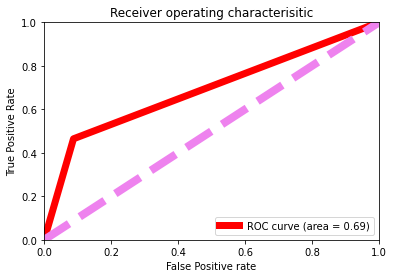

In [54]:
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

In general, an AUC of 0.5 suggests no discrimination , 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

## Model2: Decision Tree Classifier

In [56]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(5,16,2)), "min_samples_leaf": list(range(5,16,2))}
rand_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params)
rand_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = rand_tree.best_estimator_
print("Best Parameters for Decision Tree: ", rand_tree.best_params_)
print("Best Score for Decision Tree: ", rand_tree.best_score_)
       

Best Parameters for Decision Tree:  {'min_samples_leaf': 11, 'max_depth': 13, 'criterion': 'entropy'}
Best Score for Decision Tree:  0.8608054127027815


In [57]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=11).fit(X_train, y_train)
pred_train2 = dec_tree.predict(X_train)
pred_test2 = dec_tree.predict(X_test)

In [58]:
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5774
           1       0.61      0.69      0.65      1678

    accuracy                           0.83      7452
   macro avg       0.76      0.78      0.77      7452
weighted avg       0.84      0.83      0.83      7452



<AxesSubplot:title={'center':'Feature Importances of Decision Tree'}, xlabel='Importance'>

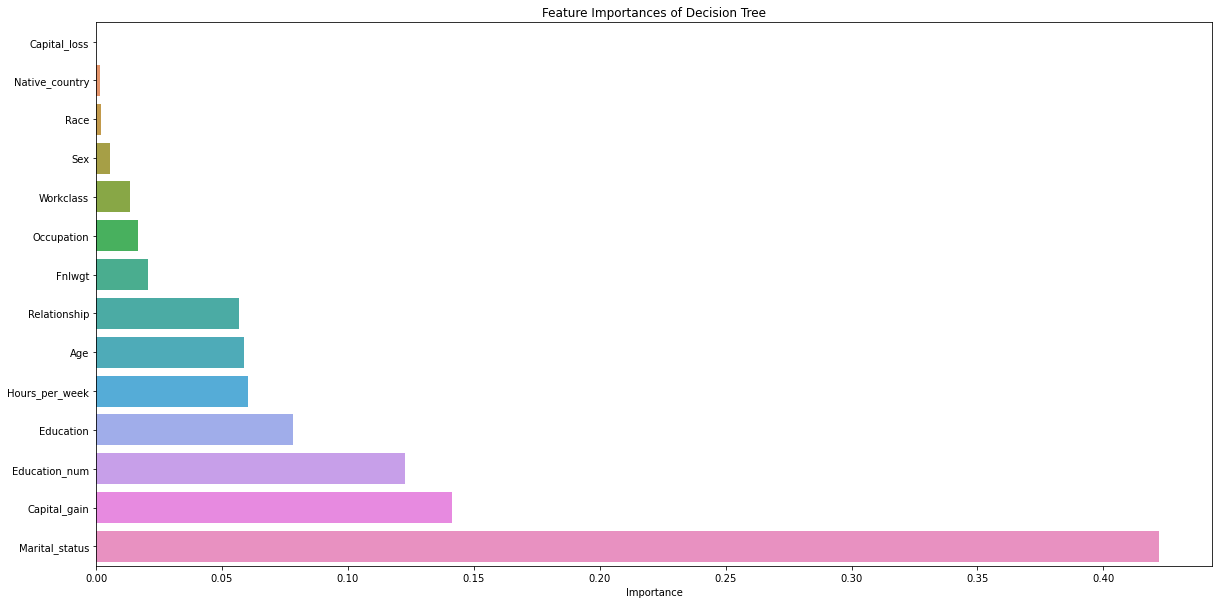

In [59]:
feat=pd.DataFrame({"Importance": tree_clf.feature_importances_}, 
                  index=x.columns).sort_values(by="Importance")
plt.figure(figsize=(20,10))
plt.title("Feature Importances of Decision Tree")

sns.barplot(feat["Importance"],feat.index)

In [62]:
pred_dt = dec_tree.predict(X_test)
dts = accuracy_score(y_test,pred_dt)
for k in range(2,10):
    dtscore=cross_val_score(dec_tree,x,y,cv=k)
    dtc=dtscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtc*100)
    print("accuracy score is : ",dts*100)
    print("\n")

At cv=  2
Cross Val score :  84.39680622651638
accuracy score is :  83.01127214170693


At cv=  3
Cross Val score :  84.6953837895867
accuracy score is :  83.01127214170693


At cv=  4
Cross Val score :  84.88325281803543
accuracy score is :  83.01127214170693


At cv=  5
Cross Val score :  84.96713711246551
accuracy score is :  83.01127214170693


At cv=  6
Cross Val score :  85.1315083199141
accuracy score is :  83.01127214170693


At cv=  7
Cross Val score :  85.0174629308662
accuracy score is :  83.01127214170693


At cv=  8
Cross Val score :  84.86312399355877
accuracy score is :  83.01127214170693


At cv=  9
Cross Val score :  85.05099302200752
accuracy score is :  83.01127214170693




At cv=  3(Difference is the least, hence cv = 3)
- Cross Val score :  84.6953837895867
- accuracy score is :  83.01127214170693


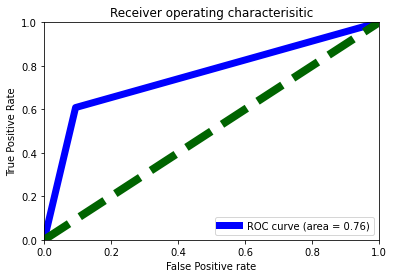

In [63]:
fpr,tpr,thresholds = roc_curve(pred_test2,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="blue",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="darkgreen",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 3: Random Forest Classifier

In [70]:
forest_params = {"max_depth": [5,8],
                  "min_samples_leaf": [5,10],"n_estimators":[150,200]}
rand_forest = RandomizedSearchCV(RandomForestClassifier(), forest_params)
rand_forest.fit(X_train, y_train)
# forest best estimator
forest_clf = rand_forest.best_estimator_
print("Best Parameters for Random Forest: ", rand_forest.best_params_)
print("Best Score for Random Forest: ", rand_forest.best_score_)
print("\n")

Best Parameters for Random Forest:  {'n_estimators': 200, 'min_samples_leaf': 10, 'max_depth': 8}
Best Score for Random Forest:  0.8569505931408271




In [79]:
rfc = RandomForestClassifier(max_depth=8, min_samples_leaf=10,n_jobs=-1,n_estimators=200).fit(X_train, y_train)
pred_train3 = rfc.predict(X_train)
pred_test3 = rfc.predict(X_test) 

<AxesSubplot:title={'center':'Feature Importances of Random Forest'}, xlabel='Importance'>

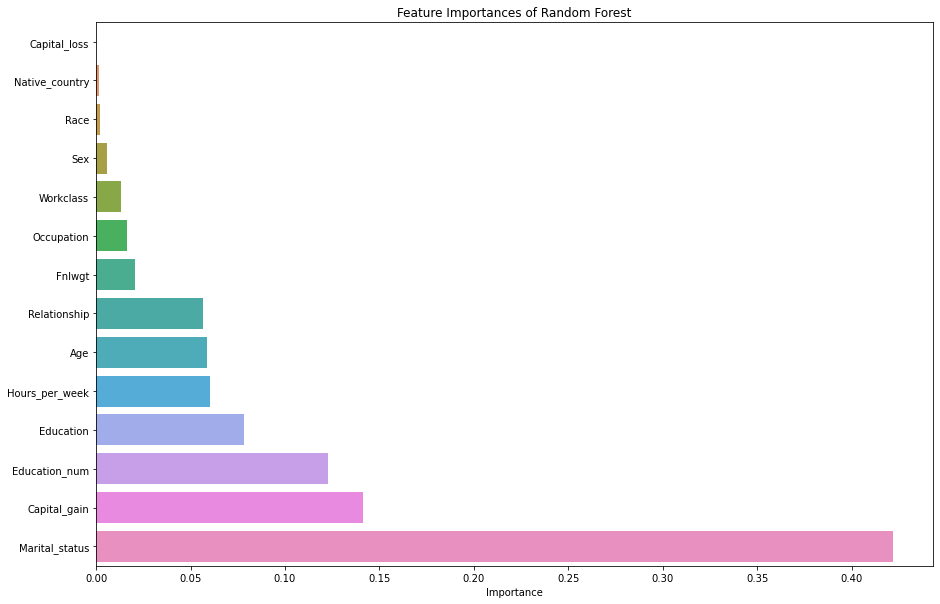

In [80]:
feat2=pd.DataFrame({"Importance": forest_clf.feature_importances_}, 
                  index=x.columns).sort_values(by="Importance")
plt.figure(figsize=(15,10))
plt.title("Feature Importances of Random Forest")

sns.barplot(feat["Importance"],feat.index)

In [81]:
print(classification_report(y_test,pred_test3))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      5774
           1       0.56      0.74      0.64      1678

    accuracy                           0.81      7452
   macro avg       0.74      0.78      0.76      7452
weighted avg       0.84      0.81      0.82      7452



In [83]:
pred_rfc = rfc.predict(X_test)
rss = accuracy_score(y_test,pred_rfc)
for k in range(2,8):
    rsscore=cross_val_score(rfc,x,y,cv=k)
    rsc=rsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rsc*100)
    print("accuracy score is : ",rss*100)
    print("\n")

At cv=  2
Cross Val score :  85.28582930756843
accuracy score is :  81.1862587224906


At cv=  3
Cross Val score :  85.37305421363394
accuracy score is :  81.1862587224906


At cv=  4
Cross Val score :  85.35292538915728
accuracy score is :  81.1862587224906


At cv=  5
Cross Val score :  85.3596583090322
accuracy score is :  81.1862587224906




KeyboardInterrupt: 

At cv=  5
- Cross Val score :  85.3596583090322
- accuracy score is :  81.1862587224906

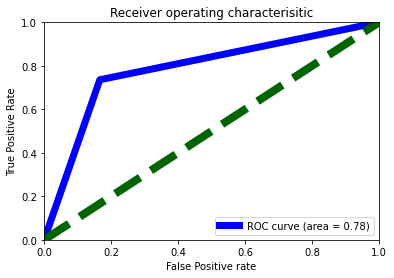

In [84]:
fpr,tpr,thresholds = roc_curve(y_test, pred_test3)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="blue",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="darkgreen",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 4: XGB Classifier

In [87]:
xgb_params = {'base_score':[0.5,1,1.5,2], 'colsample_bylevel':[1,1.25,1.5,2],'colsample_bytree':[1,2,3],'gamma':[0,1,2,3], 'learning_rate':[0.1,0.5,1,1.5,2]}
rand_xgb = RandomizedSearchCV(XGBClassifier(), forest_params)
rand_xgb.fit(X_train, y_train)
# forest best estimator
xgb_clf = rand_xgb.best_estimator_
print("Best Parameters for XGB Classifier: ", rand_xgb.best_params_)
print("Best Score for XGB Classifier: ", rand_xgb.best_score_)
print("\n")

[18:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mista

In [88]:
xgb = XGBClassifier(max_depth=8, min_samples_leaf=5,n_jobs=-1,n_estimators=200).fit(X_train, y_train)
pred_train4 = xgb.predict(X_train)
pred_test4 = xgb.predict(X_test) 

[19:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [89]:
print(classification_report(y_test,pred_test4))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5774
           1       0.67      0.63      0.65      1678

    accuracy                           0.85      7452
   macro avg       0.78      0.77      0.78      7452
weighted avg       0.84      0.85      0.85      7452



In [90]:
xgbs= accuracy_score(y_test,pred_test4)
for k in range(2,8):
    xgbscore=cross_val_score(xgb,x,y,cv=k)
    xgbc=xgbscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",xgbc*100)
    print("accuracy score is : ",xgbs*100)
    print("\n")

[19:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:04:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mista

At cv=  3
- Cross Val score :  85.18853998926463
- accuracy score is :  84.78260869565217

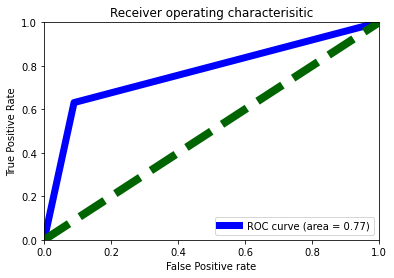

In [91]:
fpr,tpr,thresholds = roc_curve(y_test, pred_test4)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="blue",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="darkgreen",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

__Conclusion:__ We can see that xgb classifer performs the best with the accuracy score of 84.78% and cross validation score of 85.18%

In [92]:
filename = "Census_Income_Classification.pkl"
pickle.dump(xgb,open(filename,'wb'))
#saving the file